# US Cases --> US State Cases

## Initialize

### Import Packages

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Collect Relevant Datasets

In [3]:
# Select Date Range, Store as DataFrame of Strings
# We use this to select all the relevant files, organized by date

start_date = datetime.date(2021,1,1)
end_date = datetime.date(2021,4,14)

dates = pd.date_range(start_date,end_date-datetime.timedelta(days=1),freq='d')
dates_str = dates.strftime("%m-%d-%Y")

In [4]:
# Collect list of files for all the selected dates

file_list = [ ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
            + date
            + '.csv') for date in dates_str ]

In [5]:
%%time

# List of DataFrames - each one covers one day of global data
df_list = [ pd.read_csv(file) for file in file_list ]

Wall time: 48.8 s


In [6]:
# DataFrame that contains all the files' data 

super_cases = pd.concat(df_list)

In [7]:
# len(super_cases)

In [8]:
# len(df_list[0])*len(dates_str)

In [9]:
# landa = list(super_cases.index)
# for i in landa:
#     if i == 100:
#         print('yo')

In [10]:
# list(super_cases['Country_Region'])

In [11]:
super_cases.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [12]:
# Data from only US counties (counties stored in Admin2)

US_cases = super_cases[super_cases['Country_Region'] == 'US']
US_cases

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
649,1001.0,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239,50,0.0,4189.0,"Autauga, Alabama, US",7587.391935,1.179523
650,1003.0,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823,169,0.0,13654.0,"Baldwin, Alabama, US",6192.157109,1.2226
651,1005.0,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517,33,0.0,1484.0,"Barbour, Alabama, US",6145.183505,2.175346
652,1007.0,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854,46,0.0,1808.0,"Bibb, Alabama, US",8279.003304,2.481122
653,1009.0,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693,63,0.0,4630.0,"Blount, Alabama, US",8115.726490,1.342425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,56039.0,Teton,Wyoming,US,2021-04-14 04:20:41,43.935225,-110.589080,3675,9,NaN,NaN,"Teton, Wyoming, US",15662.291169,0.244898
3925,56041.0,Uinta,Wyoming,US,2021-04-14 04:20:41,41.287818,-110.547578,2153,12,NaN,NaN,"Uinta, Wyoming, US",10644.714724,0.557362
3926,90056.0,Unassigned,Wyoming,US,2021-04-14 04:20:41,NaN,NaN,0,0,NaN,NaN,"Unassigned, Wyoming, US",NaN,NaN
3927,56043.0,Washakie,Wyoming,US,2021-04-14 04:20:41,43.904516,-107.680187,898,26,NaN,NaN,"Washakie, Wyoming, US",11505.445227,2.895323


In [13]:
# US_cases

In [25]:
US_cases_byState = US_cases.groupby(['Province_State', 'Last_Update'])[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate']].sum() # ['Confirmed']
# US_cases_byState['Province_State'] = US_cases_byState.index.get_level_values(0)

# US_cases_byState['DateTime'] = pd.to_datetime(US_cases_byState.index.get_level_values(1), format='%Y-%m-%d')
# US_cases_byState['DateTime'] = US_cases_byState['DateTime'].dt.date

US_cases_byState['Date'] = US_cases_byState.index.get_level_values(1).str[0:10]
US_cases_byState

Confirmed  Deaths  Recovered    Active  \
Province_State Last_Update                                                   
Alabama        2020-12-21 13:27:30          0       0        0.0       0.0   
               2021-01-02 05:22:33     365747    4872        0.0  360875.0   
               2021-01-03 05:22:52     369458    4872        0.0  364586.0   
               2021-01-04 05:22:02     371934    4873        0.0  367061.0   
               2021-01-05 05:21:49     374095    4878        0.0  369217.0   
...                                       ...     ...        ...       ...   
Wyoming        2021-04-10 04:20:59      56873     701        0.0       0.0   
               2021-04-11 04:20:56      56873     701        0.0       0.0   
               2021-04-12 04:21:00      56873     701        0.0       0.0   
               2021-04-13 04:20:37      56988     701        0.0       0.0   
               2021-04-14 04:20:41      57070     703        0.0       0.0   

                                    Incident_Rate        Date  
Province_State Last_Update                                     
Alabama        2020-12-21 13:27:30       0.000000  2020-12-21  
               2021-01-02 05:22:33  508659.241104  2021-01-02  
               2021-01-03 05:22:52  513011.735168  2021-01-03  
               2021-01-04 05:22:02  515968.821499  2021-01-04  
               2021-01-05 05:21:49  518403.218227  2021-01-05  
...                                           ...         ...  
Wyoming        2021-04-10 04:20:59  214275.448576  2021-04-10  
               2021-04-11 04:20:56  214275.448576  2021-04-11  
               2021-04-12 04:21:00  214275.448576  2021-04-12  
               2021-04-13 04:20:37  214647.248315  2021-04-13  
               2021-04-14 04:20:41  214993.292563  2021-04-14  

[5782 rows x 6 columns]

In [15]:
# Latest Date for first cell's Last Update
US_cases.iloc[0].loc['Last_Update']

'2021-01-02 05:22:33'

In [16]:
# US_cases.loc[:, 'Last_Update'].to_datetime()

In [14]:
# hey = pd.to_datetime(US_cases.loc[:, 'Last_Update']) 

# Global Vaccination --> US Vaccination

## Initialize

In [26]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
# import zipfile

In [16]:
# zf = zipfile.ZipFile('https://app.box.com/s/efgnwjbg2cx0j94i401qhgwy0pqbhcg6') 
# df = pd.read_csv(zf.open('intfile.csv'))

In [17]:
# Global Cases
vax_GLO = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv')
vax_GLO

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-02-22,0.0,0.0,0.0,2021/02/22,4.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0,2021/02/23,4.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0,2021/02/24,4.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0,2021/02/25,4.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0,2021/02/26,4.0
...,...,...,...,...,...,...,...
14801,Zimbabwe,2021-04-20,325007.0,288229.0,36778.0,2021/04/20,716.0
14802,Zimbabwe,2021-04-21,332996.0,295631.0,37365.0,2021/04/21,716.0
14803,Zimbabwe,2021-04-22,351799.0,308071.0,43728.0,2021/04/22,716.0
14804,Zimbabwe,2021-04-23,365985.0,319732.0,46253.0,2021/04/23,716.0


In [18]:
# US daily vaccination data from Global dataset
vax_GLO_USA = vax_GLO[vax_GLO.loc[:, 'Country_Region']=='United States']
vax_GLO_USA.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
14171,United States,2020-12-20,556208.0,556208.0,0.0,2020/12/20,840.0
14172,United States,2020-12-21,614117.0,614117.0,0.0,2020/12/21,840.0
14173,United States,2020-12-22,614117.0,614117.0,0.0,2020/12/22,840.0
14174,United States,2020-12-23,1008025.0,1008025.0,0.0,2020/12/23,840.0
14175,United States,2020-12-24,1008025.0,1008025.0,0.0,2020/12/24,840.0


In [19]:
# Storing Dates as DateTime
vax_GLO_USA.loc[:, 'DateTime'] = pd.to_datetime(vax_GLO_USA.loc[:, 'Date'], format='%Y-%m-%d')
vax_GLO_USA.loc[:, 'DateTime']

C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


14171   2020-12-20
14172   2020-12-21
14173   2020-12-22
14174   2020-12-23
14175   2020-12-24
           ...    
14294   2021-04-22
14295   2021-04-23
14296   2021-04-24
14297   2021-04-25
14298   2021-04-26
Name: DateTime, Length: 128, dtype: datetime64[ns]

In [20]:
# vax_GLO_USA.loc[:, 'Doses_shipped']

In [21]:
# vax_GLO_USA[vax_GLO_USA.loc[:, 'Date'].duplicated()]

Text(0.5, 1.0, 'Total Vaccinations Administered over Time (United States)')

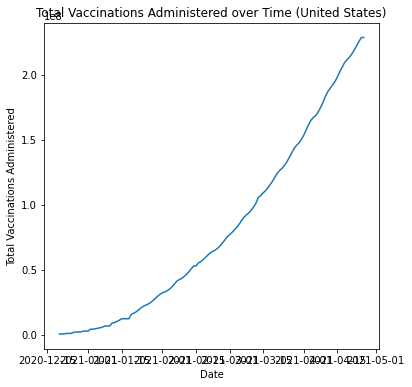

In [22]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_GLO_USA.loc[:, 'DateTime'], vax_GLO_USA.loc[:, 'Doses_admin'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (United States)')

In [23]:
# vax_GLO_USA.iloc[0:1].loc[:, 'Date']
# vax_GLO_USA.iloc

# vax_GLO_USA.loc[:, 'Doses_admin_sum'] = vax_GLO_USA.Doses_admin.cumsum()
# vax_GLO_USA['Doses_shipped_sum'] = vax_GLO_USA.Doses_shipped.cumsum()

# US Doses --> US State Doses

In [27]:
# Only USA data for All types of vaccines

vax_USA = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv')
vax_USA['DateTime'] = pd.to_datetime(vax_USA.loc[:, 'Date'], format='%Y-%m-%d')
# vax_USA.set_index(['Province_State','DateTime', 'Vaccine_Type'], inplace=True)

In [28]:
# See data for All vaccines summed

vax_USA_All = vax_USA.loc[vax_USA.loc[:, 'Vaccine_Type'] == 'All']
vax_USA_All

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,Stage_One_Doses,Stage_Two_Doses,Combined_Key,DateTime
0,Alabama,2020-12-10,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-10
3,Alabama,2020-12-11,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-11
6,Alabama,2020-12-12,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-12
9,Alabama,2020-12-13,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-13
12,Alabama,2020-12-14,All,1.0,US,32.3182,-86.9023,40950.0,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30271,Department of Defense,2021-04-27,All,NaN,US,NaN,NaN,NaN,3547800.0,2783540.0,1727172.0,979523.0,"Department of Defense, US",2021-04-27
30276,Federal Bureau of Prisons,2021-04-27,All,NaN,US,NaN,NaN,NaN,147940.0,142526.0,83085.0,58743.0,"Federal Bureau of Prisons, US",2021-04-27
30281,Indian Health Services,2021-04-27,All,NaN,US,NaN,NaN,NaN,1673335.0,1216928.0,705988.0,503573.0,"Indian Health Services, US",2021-04-27
30286,Long Term Care (LTC) Program,2021-04-27,All,NaN,US,NaN,NaN,NaN,NaN,7791592.0,NaN,NaN,"Long Term Care (LTC) Program, US",2021-04-27


In [33]:
cv_USA_All = pd.merge(vax_USA_All, US_cases_byState, how="inner", on=["Province_State", "Date"])
cv_USA_All

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,Stage_One_Doses,Stage_Two_Doses,Combined_Key,DateTime,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Alabama,2020-12-21,All,1.0,US,32.3182,-86.9023,40950.0,NaN,5181.0,5181.0,NaN,"Alabama, US",2020-12-21,0,0,0.0,0.0,0.000000
1,Alabama,2021-01-02,All,1.0,US,32.3182,-86.9023,226250.0,NaN,42810.0,20354.0,NaN,"Alabama, US",2021-01-02,365747,4872,0.0,360875.0,508659.241104
2,Alabama,2021-01-03,All,1.0,US,32.3182,-86.9023,226250.0,NaN,42810.0,20354.0,NaN,"Alabama, US",2021-01-03,369458,4872,0.0,364586.0,513011.735168
3,Alabama,2021-01-04,All,1.0,US,32.3182,-86.9023,226250.0,NaN,42810.0,20354.0,NaN,"Alabama, US",2021-01-04,371934,4873,0.0,367061.0,515968.821499
4,Alabama,2021-01-05,All,1.0,US,32.3182,-86.9023,226250.0,NaN,42810.0,20354.0,NaN,"Alabama, US",2021-01-05,374095,4878,0.0,369217.0,518403.218227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,Wyoming,2021-04-14,All,56.0,US,42.7560,-107.3025,NaN,453025.0,314169.0,181974.0,124214.0,"Wyoming, US",2021-04-14,57070,703,0.0,0.0,214993.292563
5672,Guam,2021-04-14,All,66.0,US,13.4443,144.7937,NaN,138400.0,103334.0,65745.0,36800.0,"Guam, US",2021-04-14,7847,136,0.0,0.0,4778.084260
5673,Northern Mariana Islands,2021-04-14,All,69.0,US,15.0979,145.6739,NaN,62910.0,33329.0,19617.0,14144.0,"Northern Mariana Islands, US",2021-04-14,160,2,0.0,0.0,290.149427
5674,Puerto Rico,2021-04-14,All,72.0,US,18.2208,-66.5901,NaN,2474200.0,1365025.0,880999.0,496249.0,"Puerto Rico, US",2021-04-14,117366,2174,0.0,0.0,238856.270388


In [83]:
# Cumulative efficiency = (Total doses administered so far)/(Total doses shipped so far)

cv_USA_All.loc[:, 'Cumulative_efficiency'] = cv_USA_All.loc[:, 'Doses_admin'] / cv_USA_All.loc[:, 'Doses_shipped']
cv_USA_All[cv_USA_All['Province_State'] == 'Wyoming']['Cumulative_efficiency']

4006    0.367559
4007    0.367559
4008    0.311058
4009    0.291289
4010    0.291289
          ...   
5451    0.645361
5506    0.642229
5561    0.689644
5616    0.689784
5671    0.693492
Name: Cumulative_efficiency, Length: 103, dtype: float64

In [86]:
cv_USA_All.loc[5616, 'Cumulative_efficiency']

0.6897841407247101

## Vaccine Trends for One US State

In [87]:
cv_USA = cv_USA.sort_values(by=['Province_State', 'DateTime'])

for col in ['Doses_alloc', 'Doses_shipped', 'Doses_admin']:
    cv_USA_All.loc[:, col+'_today'] = cv_USA_All.groupby(['Province_State'])[col].diff()
# cv_USA_All

In [88]:
cv_USA_All[cv_USA_All.loc[:, 'Province_State'] == 'Veterans Health Administration']

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,...,DateTime,Confirmed,Deaths,Recovered,Active,Incident_Rate,Cumulative_efficiency,Doses_alloc_today,Doses_shipped_today,Doses_admin_today


In [89]:
cv_USA_All.columns

Index(['Province_State', 'Date', 'Vaccine_Type', 'FIPS', 'Country_Region',
       'Lat', 'Long_', 'Doses_alloc', 'Doses_shipped', 'Doses_admin',
       'Stage_One_Doses', 'Stage_Two_Doses', 'Combined_Key', 'DateTime',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'Cumulative_efficiency', 'Doses_alloc_today', 'Doses_shipped_today',
       'Doses_admin_today'],
      dtype='object')

In [90]:
# cv_USA_All.loc[StateName].loc[:, 'Doses_admin'].diff()

In [127]:
cv_USA_All['Days_since_measurement'] = cv_USA_All.groupby(
    'Province_State')['DateTime'].rank(method='first', ascending=True)

In [128]:
# Analyze one state
StateName = 'Wyoming'

In [129]:
# byState.loc['Alabama', 1]

In [130]:
# # Number of doses administered each day: difference in day-to-day total dose count

# for State in byState.index:
#     byState.loc[State, 1].loc[:, 'Doses_admin_today'] = byState.loc[State, 1].loc[:, 'Doses_admin'].diff()

StateData = cv_USA_All.loc[cv_USA_All.loc[:, 'Province_State'] == StateName]
StateData

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,...,Confirmed,Deaths,Recovered,Active,Incident_Rate,Cumulative_efficiency,Doses_alloc_today,Doses_shipped_today,Doses_admin_today,Days_since_measurement
4006,Wyoming,2021-01-02,All,56.0,US,42.756,-107.3025,27075.0,21300.0,7829.0,...,44409,438,0.0,43971.0,164104.258736,0.367559,NaN,NaN,NaN,1.0
4007,Wyoming,2021-01-03,All,56.0,US,42.756,-107.3025,27075.0,21300.0,7829.0,...,44573,438,0.0,44135.0,164818.219173,0.367559,0.0,0.0,0.0,2.0
4008,Wyoming,2021-01-04,All,56.0,US,42.756,-107.3025,27075.0,26950.0,8383.0,...,44875,438,0.0,44437.0,165904.918402,0.311058,0.0,5650.0,554.0,3.0
4009,Wyoming,2021-01-05,All,56.0,US,42.756,-107.3025,27075.0,30650.0,8928.0,...,45257,438,0.0,44819.0,167272.539064,0.291289,0.0,3700.0,545.0,4.0
4010,Wyoming,2021-01-06,All,56.0,US,42.756,-107.3025,27075.0,30650.0,8928.0,...,45569,464,0.0,45105.0,168505.457578,0.291289,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,Wyoming,2021-04-10,All,56.0,US,42.756,-107.3025,NaN,447855.0,289028.0,...,56873,701,0.0,0.0,214275.448576,0.645361,NaN,11830.0,214.0,99.0
5506,Wyoming,2021-04-11,All,56.0,US,42.756,-107.3025,NaN,450525.0,289340.0,...,56873,701,0.0,0.0,214275.448576,0.642229,NaN,2670.0,312.0,100.0
5561,Wyoming,2021-04-12,All,56.0,US,42.756,-107.3025,NaN,450525.0,310702.0,...,56873,701,0.0,0.0,214275.448576,0.689644,NaN,0.0,21362.0,101.0
5616,Wyoming,2021-04-13,All,56.0,US,42.756,-107.3025,NaN,450525.0,310765.0,...,56988,701,0.0,0.0,214647.248315,0.689784,NaN,0.0,63.0,102.0


Text(0, 0.5, 'Cumulative Efficiency')

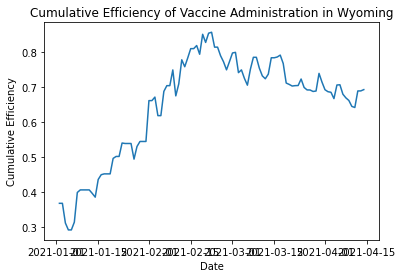

In [94]:
# Plotting Washington Cumulative Efficiency over Time

plt.plot(
    StateData[StateData.loc[:, 'DateTime'] >= datetime.datetime(2021, 1, 1)]['DateTime'],
    StateData[StateData.loc[:, 'DateTime'] >= datetime.datetime(2021, 1, 1)]['Cumulative_efficiency']
)

plt.title('Cumulative Efficiency of Vaccine Administration in ' + StateName)
plt.xlabel('Date')
plt.ylabel('Cumulative Efficiency')

Text(0, 0.5, 'Cumulative Doses Administered')

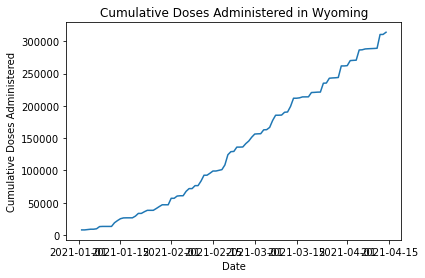

In [95]:
# Plotting Washington Total Doses Admin over Time

plt.plot(StateData.loc[:, 'DateTime'], StateData.loc[:, 'Doses_admin'])
plt.title('Cumulative Doses Administered in ' + StateName)
plt.xlabel('Date')
plt.ylabel('Cumulative Doses Administered')

Text(0, 0.5, 'Doses Administered on the Day')

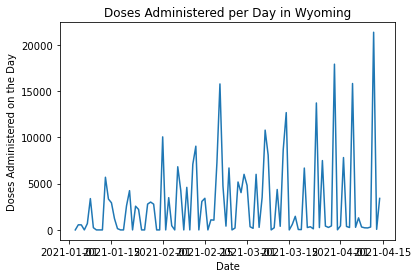

In [96]:
# Plotting Washington Doses Admin Each Day over Time

plt.plot(StateData.loc[:, 'DateTime'], StateData.loc[:, 'Doses_admin_today'])
plt.title('Doses Administered per Day in ' + StateName)
plt.xlabel('Date')
plt.ylabel('Doses Administered on the Day')

In [97]:
StateData_weekly = StateData.groupby(pd.Grouper(key="DateTime", freq="1W")).sum().loc[:, 'Doses_admin_today']
StateData_weekly.head()

DateTime
2021-01-03        0.0
2021-01-10     5407.0
2021-01-17    13327.0
2021-01-24    11628.0
2021-01-31     8584.0
Freq: W-SUN, Name: Doses_admin_today, dtype: float64

Text(0, 0.5, 'Doses Administered During the Week')

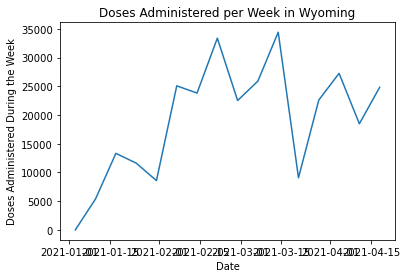

In [98]:
# Plotting Washington Doses Admin Each Week over Time

plt.plot(StateData_weekly.index, StateData_weekly)
plt.title('Doses Administered per Week in ' + StateName)
plt.xlabel('Date')
plt.ylabel('Doses Administered During the Week')

In [99]:
StateData_weekly.index[len(StateData_weekly)-1]

Timestamp('2021-04-18 00:00:00', freq='W-SUN')

In [100]:


# StateData['Days_since_start'] = pd.DataFrame(StateData['DateTime'] + pd.Timedelta(
#     StateData['DateTime'].iloc[-1] - StateData['DateTime'].iloc[0]))

# pd.Timedelta(StateData['DateTime'] - StateData['DateTime'].iloc[0])


In [118]:
cv_USA_All

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,...,Confirmed,Deaths,Recovered,Active,Incident_Rate,Cumulative_efficiency,Doses_alloc_today,Doses_shipped_today,Doses_admin_today,Days_since_measurement
0,Alabama,2020-12-21,All,1.0,US,32.3182,-86.9023,40950.0,NaN,5181.0,...,0,0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,1.0
1,Alabama,2021-01-02,All,1.0,US,32.3182,-86.9023,226250.0,NaN,42810.0,...,365747,4872,0.0,360875.0,508659.241104,NaN,185300.0,NaN,37629.0,2.0
2,Alabama,2021-01-03,All,1.0,US,32.3182,-86.9023,226250.0,NaN,42810.0,...,369458,4872,0.0,364586.0,513011.735168,NaN,0.0,NaN,0.0,3.0
3,Alabama,2021-01-04,All,1.0,US,32.3182,-86.9023,226250.0,NaN,42810.0,...,371934,4873,0.0,367061.0,515968.821499,NaN,0.0,NaN,0.0,4.0
4,Alabama,2021-01-05,All,1.0,US,32.3182,-86.9023,226250.0,NaN,42810.0,...,374095,4878,0.0,369217.0,518403.218227,NaN,0.0,NaN,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,Wyoming,2021-04-14,All,56.0,US,42.7560,-107.3025,NaN,453025.0,314169.0,...,57070,703,0.0,0.0,214993.292563,0.693492,NaN,2500.0,3404.0,103.0
5672,Guam,2021-04-14,All,66.0,US,13.4443,144.7937,NaN,138400.0,103334.0,...,7847,136,0.0,0.0,4778.084260,0.746633,NaN,8500.0,3060.0,103.0
5673,Northern Mariana Islands,2021-04-14,All,69.0,US,15.0979,145.6739,NaN,62910.0,33329.0,...,160,2,0.0,0.0,290.149427,0.529789,NaN,0.0,435.0,103.0
5674,Puerto Rico,2021-04-14,All,72.0,US,18.2208,-66.5901,NaN,2474200.0,1365025.0,...,117366,2174,0.0,0.0,238856.270388,0.551704,NaN,47470.0,16614.0,103.0


In [92]:
StateData['DateTime']

17175   2020-12-10
17178   2020-12-11
17181   2020-12-12
17184   2020-12-13
17187   2020-12-14
           ...    
28716   2021-04-22
29024   2021-04-23
29329   2021-04-24
29634   2021-04-25
29939   2021-04-26
Name: DateTime, Length: 138, dtype: datetime64[ns]

In [93]:
# # StateData['DateTime'] = StateData.index
# huh['hour'] = huh['DateTime'].dt.hour
# huh['dayofweek'] = huh['DateTime'].dt.dayofweek
# huh['quarter'] = huh['DateTime'].dt.quarter
# huh['month'] = huh['DateTime'].dt.month
# huh['year'] = huh['DateTime'].dt.year
# huh['dayofyear'] = huh['DateTime'].dt.dayofyear
# huh['dayofmonth'] = huh['DateTime'].dt.day
# # StateData['weekofyear'] = StateData['DateTime'].dt.weekofyear

In [145]:
# StateData['DateTime'] = StateData.index
# StateData.loc[:, 'hour'] = StateData['DateTime'].dt.hour
StateData.loc[:, 'dayofweek'] = StateData['DateTime'].dt.dayofweek
StateData.loc[:, 'quarter'] = StateData['DateTime'].dt.quarter
StateData.loc[:, 'month'] = StateData['DateTime'].dt.month
StateData.loc[:, 'year'] = StateData['DateTime'].dt.year
StateData.loc[:, 'dayofyear'] = StateData['DateTime'].dt.dayofyear
StateData.loc[:, 'dayofmonth'] = StateData['DateTime'].dt.day
# StateData['weekofyear'] = StateData['DateTime'].dt.weekofyear

In [146]:
# WY_Data = byState.loc['Wyoming', 1]

In [147]:
StateData_clean = StateData[StateData['Doses_admin_today'].notna()
                            & StateData['Doses_shipped'].notna()
                            & StateData['Doses_alloc'].notna()]

In [174]:
StateData_clean[['Recovered', 'Active', 'Incident_Rate', 'Days_since_measurement']].isna().sum()

Recovered                 0
Active                    0
Incident_Rate             0
Days_since_measurement    0
dtype: int64

In [175]:
StateData_clean.columns

Index(['Province_State', 'Date', 'Vaccine_Type', 'FIPS', 'Country_Region',
       'Lat', 'Long_', 'Doses_alloc', 'Doses_shipped', 'Doses_admin',
       'Stage_One_Doses', 'Stage_Two_Doses', 'Combined_Key', 'DateTime',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'Cumulative_efficiency', 'Doses_alloc_today', 'Doses_shipped_today',
       'Doses_admin_today', 'Days_since_measurement', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth'],
      dtype='object')

In [176]:
y = StateData_clean.loc[:, ['Doses_admin']]

In [184]:
X = StateData_clean[['dayofweek', 'Days_since_measurement', 'Confirmed', 'Recovered', 'Active', 'Incident_Rate']]

In [185]:
# X+dt.

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # evaluating model with mean absolute error

In [187]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# X_train = X
# y_train = y
# X_test = huh.loc[:, ['dayofweek', 'month', 'year', 'dayofmonth']]

In [188]:
# type(X['weekofyear'].iloc[0])

In [189]:
# Random Forest model function

from sklearn.ensemble import RandomForestRegressor

def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    vax_model = RandomForestRegressor(random_state=1)
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

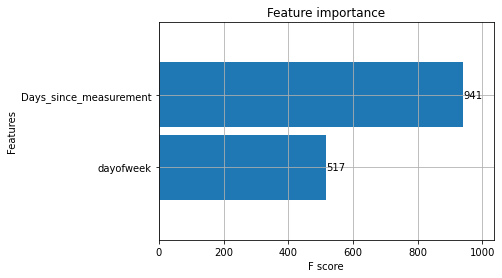

In [190]:
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

def get_xgb_regressor_mae(X_trn, X_tst, y_trn, y_tst):
    vax_model = XGBRegressor(random_state=1)
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    _ = plot_importance(vax_model, height=0.9)
    return

get_xgb_regressor_mae(X_train, X_test, y_train, y_test)

In [197]:
vax_model = RandomForestRegressor(random_state=1)
vax_model.fit(X_train, y_train)
y_test_pred = vax_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mae

<ipython-input-197-d2afc9e55bbf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  vax_model.fit(X_train, y_train)


1303.8633333333332

In [210]:
y.copy().values.ravel()

array([  7829.,   8383.,   8928.,   8928.,   9611.,  12996.,  13236.,
        13236.,  13236.,  13236.,  18928.,  22266.,  25196.,  26423.,
        26563.,  26563.,  26563.,  29170.,  33414.,  33414.,  35976.,
        38191.,  38191.,  38191.,  40981.,  43992.,  46775.,  46775.,
        46775.,  56831.,  56831.,  60317.,  60775.,  60775.,  67600.,
        71858.,  71858.,  83554.,  92603.,  92603.,  95682.,  99099.,
        99099., 100186.])

In [192]:
# plt.plot(StateData['DateTime'], y_test_pred)

In [193]:
# X_test

In [194]:
# get_random_forest_mae(X_train, X_test, y_train, y_test)

In [195]:
# y

In [140]:
# StateData[StateData['Doses_shipped'].notna()]

In [141]:
vax_model = XGBRegressor(random_state=1)
vax_model.fit(X_train, y_train)
y_test_pred = vax_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)

C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


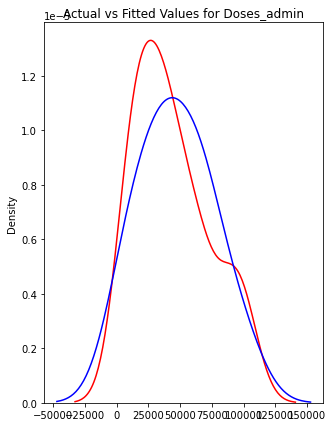

In [207]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Doses_admin')


plt.show()
plt.close()

## Recursive Feature Selection for Random Forest

In [216]:
## Recursive feature selection -- random forest 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
RF_feature = RandomForestRegressor(max_depth = 7, n_estimators = 100)

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=RF_feature, step=1, cv = 5,
              scoring='neg_mean_absolute_error',
              min_features_to_select = min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d arra

Optimal number of features : 4


C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:629: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(self.transform(X), y)


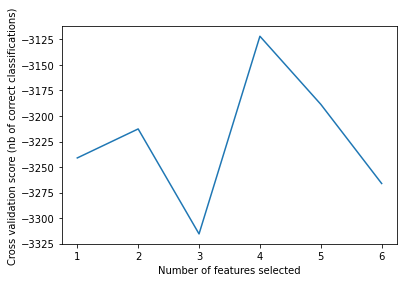

In [217]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [218]:
print(np.where(rfecv.support_ == False)[0])

[0 3]


<ipython-input-219-fa9a34b19143>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_featureImportance.fit(X_train, y_train)


<BarContainer object of 6 artists>

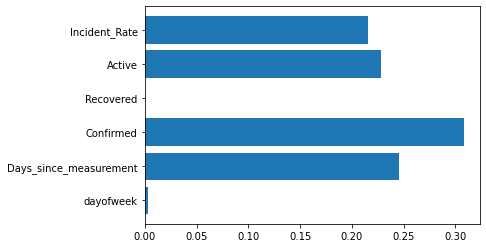

In [219]:
### Fine tuning random forest
from sklearn.model_selection import GridSearchCV
RF_featureImportance = RandomForestRegressor(max_depth = 7, n_estimators = 100)

RF_featureImportance.fit(X_train, y_train)


plt.figure()
plt.barh(X.columns, RF_featureImportance.feature_importances_)